In [1074]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import numpy as np
from numpy import log
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import math

import warnings
warnings.filterwarnings('ignore')

In [1075]:
co2_emission_data = pd.read_csv("data/CO2 dataset.csv")

### PreProcessing

In [1076]:
co2_emission_data.head(5)

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [1077]:
co2_emission_data.tail(5)

,Year,CO2
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [1078]:
co2_emission_data.shape

(215, 2)

In [1079]:
co2_emission_data.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


#### Insights
#### 1. Contains 215 Observations & 2 Features
#### 2. Data have  gotten from year of 1800 to 2014
#### 3. The  CO2 Emission range from 0.001750 to 18.200000 in between year of 1800 to 2014

In [1080]:
co2_emission_data.isna().sum()

Year    0
CO2     0
dtype: int64

In [1081]:
co2_emission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


#### Insights
#### 1 Not Contains any null value

In [1082]:
co2_emission_data.duplicated().sum()

0

#### Insights:
#### Not Contatins any Duplicate Values

In [1083]:
co2_emission_data['Year'].unique()

array([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832,
       1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
       1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
       1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 19

In [1084]:
co2_emission_data['CO2'].unique()

array([5.68e-03, 5.61e-03, 5.55e-03, 5.48e-03, 5.42e-03, 5.36e-03,
       5.29e-03, 5.23e-03, 5.17e-03, 5.11e-03, 5.04e-03, 4.97e-03,
       4.90e-03, 4.83e-03, 4.75e-03, 4.66e-03, 4.57e-03, 4.47e-03,
       4.38e-03, 4.27e-03, 4.17e-03, 4.06e-03, 3.95e-03, 3.84e-03,
       3.73e-03, 3.62e-03, 3.50e-03, 3.39e-03, 3.27e-03, 3.16e-03,
       3.05e-03, 2.94e-03, 2.83e-03, 2.73e-03, 2.63e-03, 2.53e-03,
       2.44e-03, 2.35e-03, 2.27e-03, 2.18e-03, 2.10e-03, 2.02e-03,
       1.95e-03, 1.88e-03, 1.81e-03, 1.75e-03, 1.18e-02, 1.47e-02,
       1.74e-02, 1.98e-02, 2.36e-02, 2.71e-02, 3.18e-02, 3.76e-02,
       4.45e-02, 5.22e-02, 6.08e-02, 7.15e-02, 8.53e-02, 9.96e-02,
       1.18e-01, 1.39e-01, 1.67e-01, 2.06e-01, 2.42e-01, 2.88e-01,
       3.46e-01, 4.36e-01, 2.55e-01, 1.82e-01, 3.21e-01, 4.61e-01,
       4.71e-01, 4.06e-01, 4.04e-01, 4.50e-01, 4.84e-01, 4.56e-01,
       5.08e-01, 1.20e+00, 1.27e+00, 1.48e+00, 1.64e+00, 1.87e+00,
       1.78e+00, 2.14e+00, 2.77e+00, 2.33e+00, 2.53e+00, 2.81e

<AxesSubplot:xlabel='Year'>

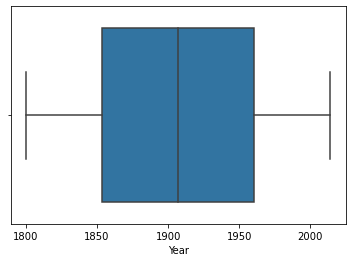

In [1085]:
# Checking Outliers
sns.boxplot(co2_emission_data['Year'])

<AxesSubplot:xlabel='CO2'>

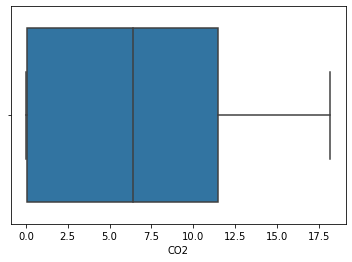

In [1086]:
sns.boxplot(co2_emission_data['CO2'])

### Insights
#### 1. No Incorrect Values or Outliers present

<AxesSubplot:xlabel='CO2', ylabel='Density'>

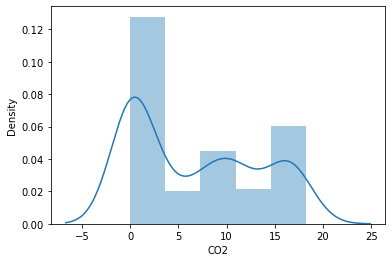

In [1087]:
sns.distplot(co2_emission_data['CO2'])

#### data is Normally distributed

In [1088]:
# Convert Year to date time format
co2_emission_data['Date'] =pd.to_datetime(co2_emission_data['Year'], format='%Y')
co2_emission_data.drop(['Year'], axis=1,inplace=True)
co2_emission_data

,CO2,Date
0,0.00568,1800-01-01
1,0.00561,1801-01-01
2,0.00555,1802-01-01
3,0.00548,1803-01-01
4,0.00542,1804-01-01
...,...,...
210,15.60000,2010-01-01
211,15.60000,2011-01-01
212,14.80000,2012-01-01
213,14.70000,2013-01-01


In [1089]:
co2_emission_data.dtypes

CO2            float64
Date    datetime64[ns]
dtype: object

### EDA

In [1090]:
X = np.array(co2_emission_data.index.tolist())
y = np.array(co2_emission_data['CO2'])
model = np.poly1d(np.polyfit(X, y, 4))

Text(0.5, 1.0, 'Years wise CO2 Eission')

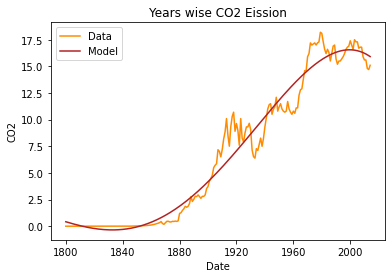

In [1091]:
plt.plot(co2_emission_data['Date'],co2_emission_data['CO2'],label='Data',color='darkorange')
plt.plot(co2_emission_data['Date'],model(X),label='Model',color='firebrick')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.legend()
plt.title('Years wise CO2 Eission')

#### Insights
#### 1. In between year of 1800-1880, has low co2 emission.
#### 2. After that it has started high voulm of Co2 emision by every year.
#### 3. After 2000 we can able to see some slightly decrease in CO2 emmision

In [1092]:
temp_co2_emission_data = co2_emission_data.set_index('Date')
temp_co2_emission_data

,CO2
Date,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


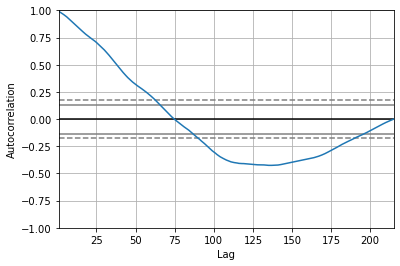

In [1093]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp_co2_emission_data['CO2'])
plt.show() 

### Seasonality

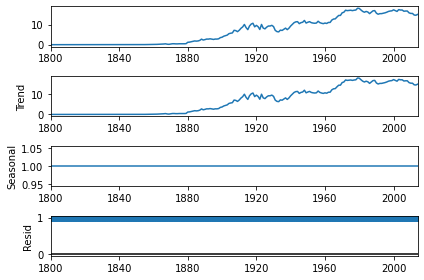

In [1094]:
analysis = temp_co2_emission_data[['CO2']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


Text(0.5, 1.0, 'Seasonal Data of Last 5 years CO2 Emission')

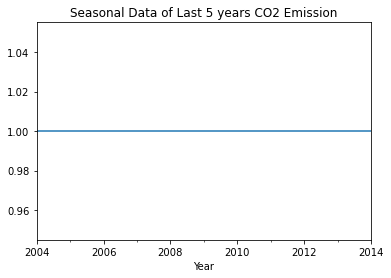

In [1095]:
decompose_result_mult.seasonal['2004':'2014'].plot();
plt.xlabel("Year")
plt.title("Seasonal Data of Last 5 years CO2 Emission")

Text(0.5, 1.0, 'Trend Data of Last 10 years CO2 Emission')

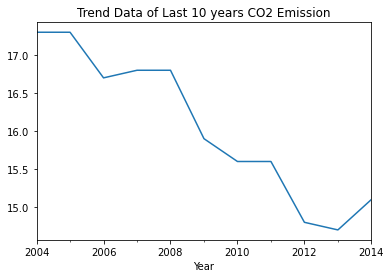

In [1096]:
decompose_result_mult.trend['2004':'2014'].plot();
plt.xlabel("Year")
plt.title("Trend Data of Last 10 years CO2 Emission")

#### Yearwise Trend occured.

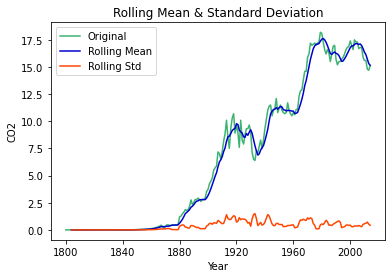

Test Statistic                  -0.438968
p-value                          0.903386
#Lags Used                       0.000000
Number of Observations Used    212.000000
dtype: float64

In [1097]:
# Visualize CO2 emissions  since 1800,
# including 5-year rolling mean and rolling standard deviation

roll_mean = temp_co2_emission_data.rolling(window=5, center=False).mean()
roll_std = temp_co2_emission_data.rolling(window=5, center=False).std()

plt.plot(temp_co2_emission_data,color='mediumseagreen', label='Original')
plt.plot(roll_mean, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.show(block=False)

# Dickey-Fuller test
test = adfuller(temp_co2_emission_data['CO2'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

#### 1. With a p value of 0.903386, we cannot reject the null hypothesis that this data is Non-stationary. We will remedy this below before fitting our model.
#### 2. Data is Non-stationary

### Convertion of Non Stationary to Stationary

### Log Transformation

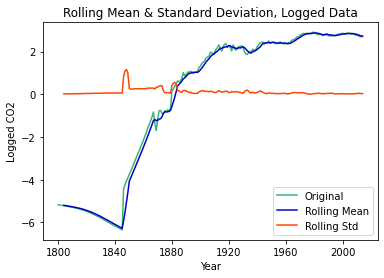

Test Statistic                  -1.369411
p-value                          0.596850
#Lags Used                       1.000000
Number of Observations Used    211.000000
dtype: float64

In [1098]:
# Log transformation to address lack of variance and covariance
# Create new df that contains the logged values of the original one
log_co2_emission_data = log(temp_co2_emission_data)

# Visualize logged data, including 5-year rolling mean and standard deviation
roll_mean_log = log_co2_emission_data.rolling(window=5, center=False).mean()
roll_std_log = log_co2_emission_data.rolling(window=5, center=False).std()

plt.plot(log_co2_emission_data,color='mediumseagreen', label='Original')
plt.plot(roll_mean_log, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std_log, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation, Logged Data')
plt.xlabel('Year')
plt.ylabel('Logged CO2')
plt.show(block=False)

# Dickey-Fuller test
test = adfuller(log_co2_emission_data['CO2'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

#### Though our p-value of 0.596850 , we cannot  to reject the null hypothesis that this data is unstationary, since there is very clearly an non-constant mean, we will try another way to achieve true stationarity.

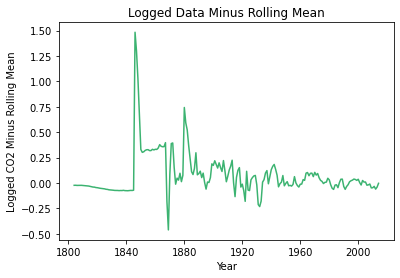

Test Statistic                -6.081496e+00
p-value                        1.089454e-07
#Lags Used                     1.000000e+00
Number of Observations Used    2.070000e+02
dtype: float64

In [1099]:
# Subtract rolling mean from log-transformed data
log_minus_rollmean = log_co2_emission_data - roll_mean_log

# Drop null values
log_minus_rollmean.dropna(axis=0,inplace=True)

# Plot data
plt.plot(log_minus_rollmean, color='mediumseagreen')
plt.title('Logged Data Minus Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Logged CO2 Minus Rolling Mean')
plt.show(block=False)

# Dickey-Fuller test on logged data minus rolling mean
test = adfuller(log_minus_rollmean['CO2'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

####  This data looks much more stationary based on its plot and its Dickey-Fuller test also yielded a very low p-value, indicating that we can confidently reject the null hypothesis that the data is non-stationary.

### Differencing

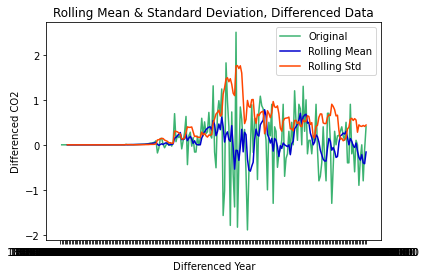

Test Statistic                  -3.689243
p-value                          0.004267
#Lags Used                      15.000000
Number of Observations Used    197.000000
dtype: float64

In [1100]:
# Difference original df
diff = temp_co2_emission_data.diff().rename(index=str, columns={"CO2": "Differenced Observations"})

# Visualize differenced data, including 5-year rolling mean and standard deviation
roll_mean_diff = diff.rolling(window=5, center=False).mean()
roll_std_diff = diff.rolling(window=5, center=False).std()

plt.plot(diff,color='mediumseagreen', label='Original')
plt.plot(roll_mean_diff, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std_diff, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation, Differenced Data')
plt.xlabel('Differenced Year')
plt.ylabel('Differenced CO2')
plt.show(block=False)

# Dickey-Fuller test on differenced data
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

#### Based on the above p-value of 1.458911e-23, we see that we have achieved stationarity by differencing once. We will keep this in mind as we test d values in our ARIMA model below.

#### data is stationary

### Modeling

#### ACF and PACF for Logged Data

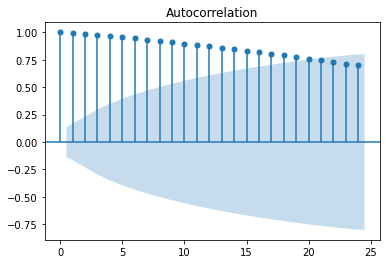

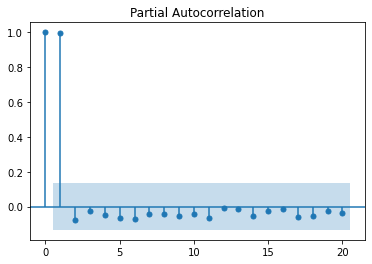

In [1101]:
# ACF for logged data
plot_acf(log_co2_emission_data[:-1], alpha=.05);

# PACF for logged data
plot_pacf(log_co2_emission_data[:-1], alpha=.05, lags=20);

#### This data displays an AR signature since the ACF diminishes gradually and the PACF cuts off sharply. This tells us we would expect to have at least one AR parameter.
#### When instantiating an ARIMA model, we would expect a relatively large number of MA terms due to the large number of significant ACF points and a relatively small number of AR terms due to the small number of significant PACF points.

### Split Data into Train and Test### Split Data into Train and Test

X_train Shape (172,)
y_train Shape (172,)
X_test Shape (43,)
y_test Shape (43,)


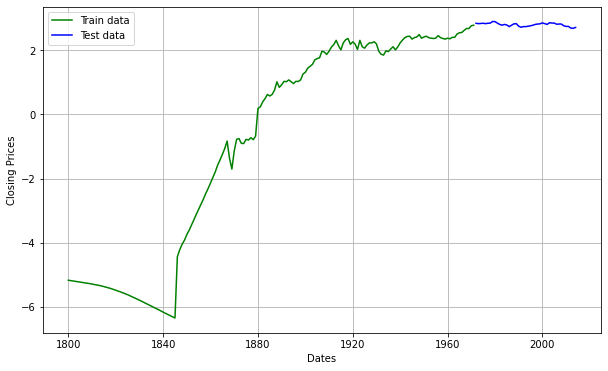

In [1102]:
split_data = dict()
def split_data_fn(co2_emission_log):
    co2_train_data, co2_test_data = co2_emission_log[0:int(len(co2_emission_log)*0.8)], co2_emission_log[int(len(co2_emission_log)*0.8):]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(co2_train_data, 'green', label='Train data')
    plt.plot(co2_test_data, 'blue', label='Test data')
    plt.legend()
    X_train, X_test = co2_train_data.index , co2_test_data.index
    y_train, y_test = co2_train_data['CO2'] , co2_test_data['CO2']
    print("X_train Shape",X_train.shape)
    print("y_train Shape",y_train.shape)
    print("X_test Shape",X_test.shape)
    print("y_test Shape",y_test.shape)
    return X_train, X_test,y_train, y_test,co2_train_data, co2_test_data 
X_train, X_test,y_train, y_test,co2_train_data, co2_test_data  = split_data_fn(log_co2_emission_data)

In [1103]:
y_train

Date
1800-01-01   -5.170804
1801-01-01   -5.183205
1802-01-01   -5.193957
1803-01-01   -5.206650
1804-01-01   -5.217659
                ...   
1967-01-01    2.624669
1968-01-01    2.681022
1969-01-01    2.681022
1970-01-01    2.766319
1971-01-01    2.785011
Name: CO2, Length: 172, dtype: float64

### ARMA Model for Logged Data - p=1, q=1,d=0

In [1104]:
# Instantiate ARMA model for logged data

# Instantiate model
mod_ARMA = ARMA(co2_train_data, order=(1,0,1))

# Fit Model
mod_ARMA_fit = mod_ARMA.fit()

# Obeserve summary statistics

print(mod_ARMA_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    CO2   No. Observations:                  172
Model:                     ARMA(1, 0)   Log Likelihood                  29.244
Method:                       css-mle   S.D. of innovations              0.201
Date:                Fri, 26 Aug 2022   AIC                            -52.488
Time:                        23:23:30   BIC                            -43.046
Sample:                    01-01-1800   HQIC                           -48.657
                         - 01-01-1971                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1619      3.659     -0.318      0.751      -8.334       6.010
ar.L1.CO2      0.9987      0.002    564.685      0.000       0.995       1.002
                                    Roots           

### Model forecasting

In [1105]:
# Since Test data starts from 1972
pred = mod_ARMA_fit.predict(start='1972-01-01', end='2014-01-01', dynamic=False)

### Determine  RMSE

In [1106]:
from sklearn import metrics
def RMSE_log(pred):
    return np.sqrt(metrics.mean_squared_error(y_test,np.e**pred))

ARMA_RMSE  = RMSE_log(pred)
print('RMSE score for ARMA model on logged data: ',ARMA_RMSE)

RMSE score for ARMA model on logged data:  11.70289145027659


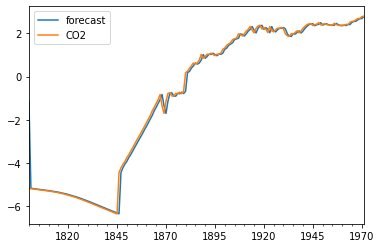

In [1107]:
# Visualize prediction
# This shows our model's predicted values vs actual values for the train data
mod_ARMA_fit.plot_predict();

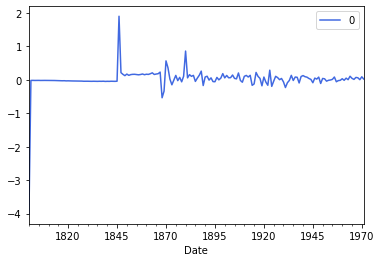

In [1108]:
# Visualize residuals/error
residuals = pd.DataFrame(mod_ARMA_fit.resid)
residuals.plot(color='royalblue')
plt.show();

#### Based on the above, we see that this model has minimal error, with a mean of approximately 0.

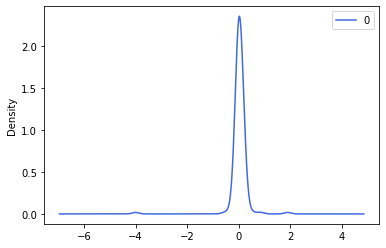

In [1109]:
# Check for linearity
residuals = pd.DataFrame(mod_ARMA_fit.resid)
residuals.plot(kind='kde', color='royalblue')
plt.show()

#### Based on the above, we see that this model is linear, with a mean of approxmiately 0.

#### Test prediction

In [1110]:
original_df = log_co2_emission_data[X_train.shape[0]:].reset_index()

arma_predictions = pd.DataFrame(index=range(0,len(original_df)),columns=['Date','Prediction'])
for i in range(0,len(original_df)):
    arma_predictions['Date'][i] = original_df['Date'][i].date()
    arma_predictions['Prediction'][i] = np.e**(pred[i])
    
arma_predictions.set_index('Date',inplace=True)    
arma_predictions

,Prediction
Date,
1972-01-01,16.113971
1973-01-01,16.028513
1974-01-01,15.943624
1975-01-01,15.859297
1976-01-01,15.77553
1977-01-01,15.692317
1978-01-01,15.609654
1979-01-01,15.527537
1980-01-01,15.445962


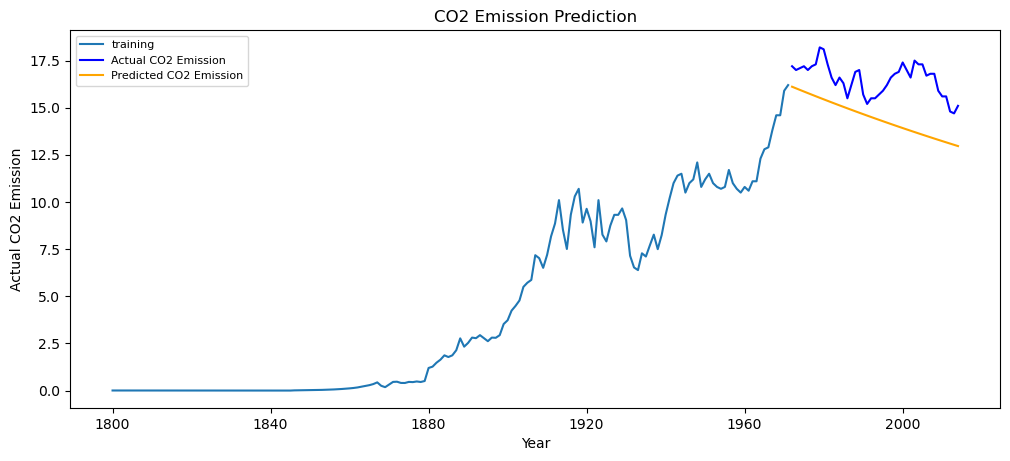

In [1111]:
#for plotting
def create_lstm_forecasting():
    plt.figure(figsize=(12,5), dpi=100)
    #for plotting
    train_data = np.e**(log_co2_emission_data[:X_train.shape[0]])
    test_data = np.e**(log_co2_emission_data[X_train.shape[0]:])
    plt.plot(train_data,label='training')
    plt.plot(test_data, color = 'blue', label='Actual CO2 Emission')
    plt.plot(arma_predictions, color = 'orange',label='Predicted CO2 Emission')
    plt.title('CO2 Emission Prediction')
    plt.xlabel('Year')
    plt.ylabel('Actual CO2 Emission')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
create_lstm_forecasting()

#### LSTM Model

In [1112]:
dataset = log_co2_emission_data.CO2.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 
# define input sequence
raw_seq = train
# choose a number of time steps
n_steps = 1
# split into samples
X, y = split_sequence(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [1113]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=100, verbose=0)
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 50)                10400     
                                                                 
 dense_50 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [1114]:
x_input = test
x_input = x_input.reshape((test.shape[0], n_steps, n_features))
pred = model.predict(x_input, verbose=0)
pred = np.e**(scaler.inverse_transform(pred))

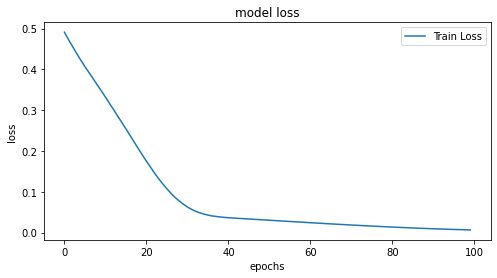

In [1115]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [1116]:
pred = pred.flatten()
original_df = log_co2_emission_data[train_size:].reset_index()

lstm_predictions = pd.DataFrame(index=range(0,len(original_df)),columns=['Date','Prediction'])
for i in range(0,len(original_df)):
    lstm_predictions['Date'][i] = original_df['Date'][i].date()
    lstm_predictions['Prediction'][i] = pred[i]
    
lstm_predictions.set_index('Date',inplace=True)    
lstm_predictions

,Prediction
Date,
1972-01-01,14.256156
1973-01-01,14.086298
1974-01-01,14.171203
1975-01-01,14.256156
1976-01-01,14.086298
1977-01-01,14.256156
1978-01-01,14.34114
1979-01-01,15.107539
1980-01-01,15.02225


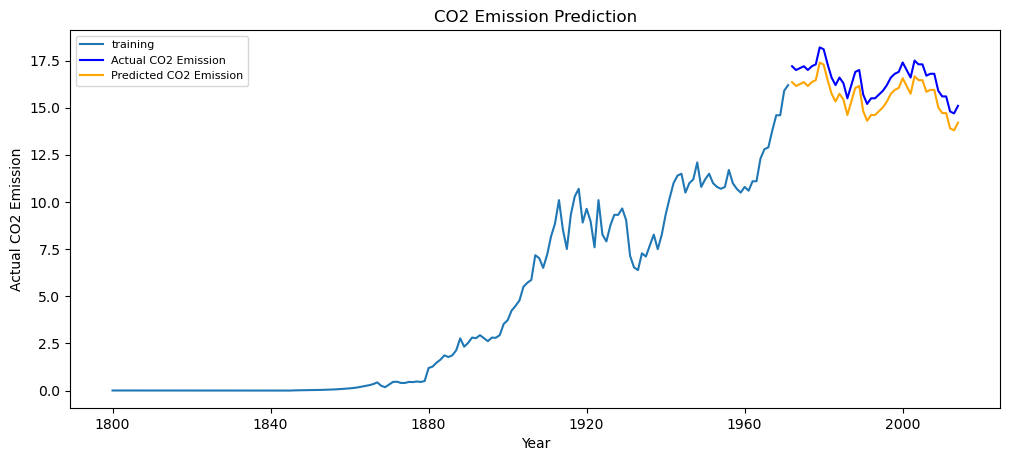

In [1117]:
#for plotting
def create_lstm_forecasting():
    plt.figure(figsize=(12,5), dpi=100)
    #for plotting
    train_data = np.e**(log_co2_emission_data[:len(train)])
    test_data = np.e**(log_co2_emission_data[len(train):])
    lstm_Predictions = lstm_close_stocks_predictions
    plt.plot(train_data,label='training')
    plt.plot(test_data, color = 'blue', label='Actual CO2 Emission')
    plt.plot(lstm_Predictions, color = 'orange',label='Predicted CO2 Emission')
    plt.title('CO2 Emission Prediction')
    plt.xlabel('Year')
    plt.ylabel('Actual CO2 Emission')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
create_lstm_forecasting()

In [1118]:
tst_data = test.reshape(len(test),1)
LSTM_RMSE  = math.sqrt(mean_squared_error(tst_data, pred))
print('RMSE score for LSTM model on logged data: ',LSTM_RMSE )

RMSE score for LSTM model on logged data:  12.703395864078715


In [1119]:
data = [[ARMA_RMSE], [LSTM_RMSE]]
df = pd.DataFrame(data, columns=['RMSE'],index=['ARMA',
                               'LSTM'])
df

,RMSE
ARMA,11.702891
LSTM,12.703396


### We choose ARMA as best model for forecasting the CO2 Emission time series data

### Next 50 years CO2 Emission Prediction starts from 2014  Using ARMA

In [1120]:
pred = mod_ARMA_fit.predict(start='1800-01-01', end='2064-01-01', dynamic=False).to_frame('CO2')
full_pred_data = pred.copy()
future_pred_data = full_pred_data[len(co2_emission_data):]
np.e**(future_pred_data)

,CO2
2015-01-01,12.902196
2016-01-01,12.837620
2017-01-01,12.773455
2018-01-01,12.709696
2019-01-01,12.646341
2020-01-01,12.583386
2021-01-01,12.520829
2022-01-01,12.458667
2023-01-01,12.396897
2024-01-01,12.335516


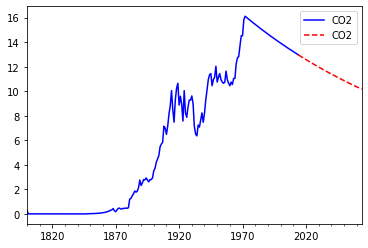

In [1121]:
past_data = np.e**(full_pred_data.iloc[:len(co2_emission_data),:])
future_data = np.e**(full_pred_data.iloc[len(co2_emission_data)-1:,:])
ax = past_data.plot(ls="-", color="b")
future_data.plot(ls="--", color="r", ax=ax)
plt.show()

In [1122]:
# 